<a href="https://colab.research.google.com/github/NMashalov/2023_OpenMipt_course/blob/main/lesson1/hw_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 1

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  10 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash;  50 баллов







-----

In [ ]:
# Bot check

# HW_ID: phds_hw1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [4]:
!pip install torchviz

In [5]:
import torchviz

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch.autograd import grad
from torch import nn
from torch.utils.data import Dataset
from sklearn.metrics import precision_recall_fscore_support as all_metrics
from sklearn.metrics import accuracy_score

from collections import defaultdict

from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split

from IPython.display import clear_output

In [6]:
sns.set(palette='Set2', font_scale=1.2)
%matplotlib inline

### Задача 1. Дифференцирование

Для функции

$$ f(x, y, z)=\left(\frac{y^4}{1+e^{-x}}\right)^3 + z$$

С помощью Pytorch:

- постройте вычислительный граф с возможностью считать производные по x, y.

- выведите все узлы полученного графа и их атрибуты (рассмотренные на лекции)

- объясните, почему атрибуты принимают такие значения

Для точки (1, 3, 2):

- посчитайте для функции все возможные первые частные производные методом backward()

- посчитайте для функции все возможные вторые частные производные

Градиент f по x: tensor(167529.2500)
Градиент f по y: tensor(830561.2500)


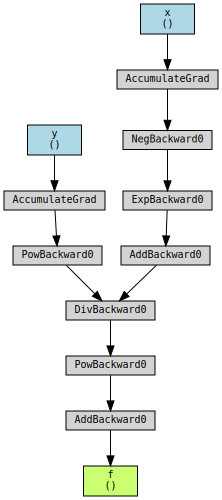

In [26]:
from torchviz import make_dot
x = torch.tensor(1, requires_grad=True, dtype=torch.float)
y = torch.tensor(3, requires_grad=True, dtype=torch.float)
z = torch.tensor(2, dtype=torch.float)

f = ((y**4)/ (1+torch.exp(-x)))**3 + z
f.backward()

print('Градиент f по x:', x.grad)
print('Градиент f по y:', y.grad)

make_dot(f, params={'x': x, 'y': y,'f': f})

In [24]:
from torch.autograd.functional import jacobian,hessian
def f(x,y,z):
    return ((y**4)/ (1+torch.exp(-x)))**3 + z

print('Jacobian:',jacobian(f,(x,y,z)))
print('Hessian:',torch.tensor(hessian(f,(x,y,z))))

Jacobian: (tensor(167529.2500), tensor(830561.2500), tensor(1.))
Hessian: tensor([[  12692.9795,  670117.0000,       0.0000],
        [ 670117.0000, 3045391.0000,       0.0000],
        [      0.0000,       0.0000,       0.0000]])


Первые производные рассчитаны верно

Для производной по x

$$
(1594323 e^3)/(1 + e)^4
$$
Для производной по y
$$
(2125764 e^3)/(1 + e)^3
$$
Вторые производные расчитаны верно
Вторые производная по x:
$$
-(1594323 (-3 + e) e^3)/(1 + e)^5
$$
Вторая производная по y:
$$
(7794468 e^3)/(1 + e)^3
$$
Смешанная производная по x и y:
$$
(6377292 e^3)/(1 + e)^4
$$








### Задача 2.
#### Профиль физика

Скачайте [датасет](https://disk.yandex.ru/d/LighhESdTbYk6Q), описывающий распады Z-бозонов двух типов: `Zee`и `Zmumu`. Создайте и обучите нейросеть, разделяющую эти два класса.

[Описание датасета](https://www.kaggle.com/datasets/omidbaghchehsaraei/identification-of-two-modes-of-z-boson?resource=download)

In [ ]:
import requests
from urllib.parse import urlencode
import zipfile

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/LighhESdTbYk6Q'  # Сюда вписываете вашу ссылку

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
print(final_url)
response = requests.get(final_url)
download_url = response.json()['href']

print(download_url)

# Загружаем файл и сохраняем его
download_response = requests.get(download_url)
with open('output_file.zip', 'wb') as result:
        result.write(download_response.content)

zip_ref = zipfile.ZipFile("output_file.zip", 'r')
zip_ref.extractall("extracted_file")
zip_ref.close()


https://cloud-api.yandex.net/v1/disk/public/resources/download?public_key=https%3A%2F%2Fdisk.yandex.ru%2Fd%2FLighhESdTbYk6Q
https://downloader.disk.yandex.ru/disk/1050c00654423a73ccf18156a2d29f407127b45e10ed6cafdcd39147ae364381/650e4185/fKqInKw3d7bLFOeFnMGnhIGUuMn4NhXxMk1CGXDn7uiJ3CCMlO1rG7eWS242UkLzidh5mdAu9GnyOyj7YHlFCUUCDw8-ptgyMbcS2b047-er8npumZHI4midPdWhecNq?uid=0&filename=kaggle_Z_boson.zip&disposition=attachment&hash=tLBPmtI8BjHOFvBHVx8Drj5qyERdcb0AdeSv44svNpA0X26RjK20pdA91mej2eNQq/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=application%2Fzip&owner_uid=1674347467&fsize=627191&hid=18f1c2f3c4a0f92507cf8264b2ea5e2b&media_type=compressed&tknv=v2


Удалите столбцы 'Unnamed: 0	', 'Run' и 'Event', так как это не физические величины. Удалите строки, где есть пропуски, если таковые имеются.

In [ ]:
df = pd.read_csv('extracted_file/Z_boson.csv',index_col=0)
df.dropna(axis=1,inplace=True)
df.drop(['Run','Event'],axis=1,inplace=True)

Убедитесь, что классы сбалансированны.

In [ ]:
df['class'].value_counts()

Zmumu    10000
Zee      10000
Name: class, dtype: int64

Также можно как-нибудь взглянуть на признаки. Возможно, не все они вносят вклад в разделение классов. Не забудьте преобразовать таргет (столбец 'class') к формату 0 и 1. Вам может пригодиться `sklearn.preprocessing.LabelBinarizer`.

In [ ]:
from sklearn.preprocessing import LabelBinarizer
df['target'] = LabelBinarizer().fit_transform(df['class'])
df.drop(['class'],axis=1,inplace=True)

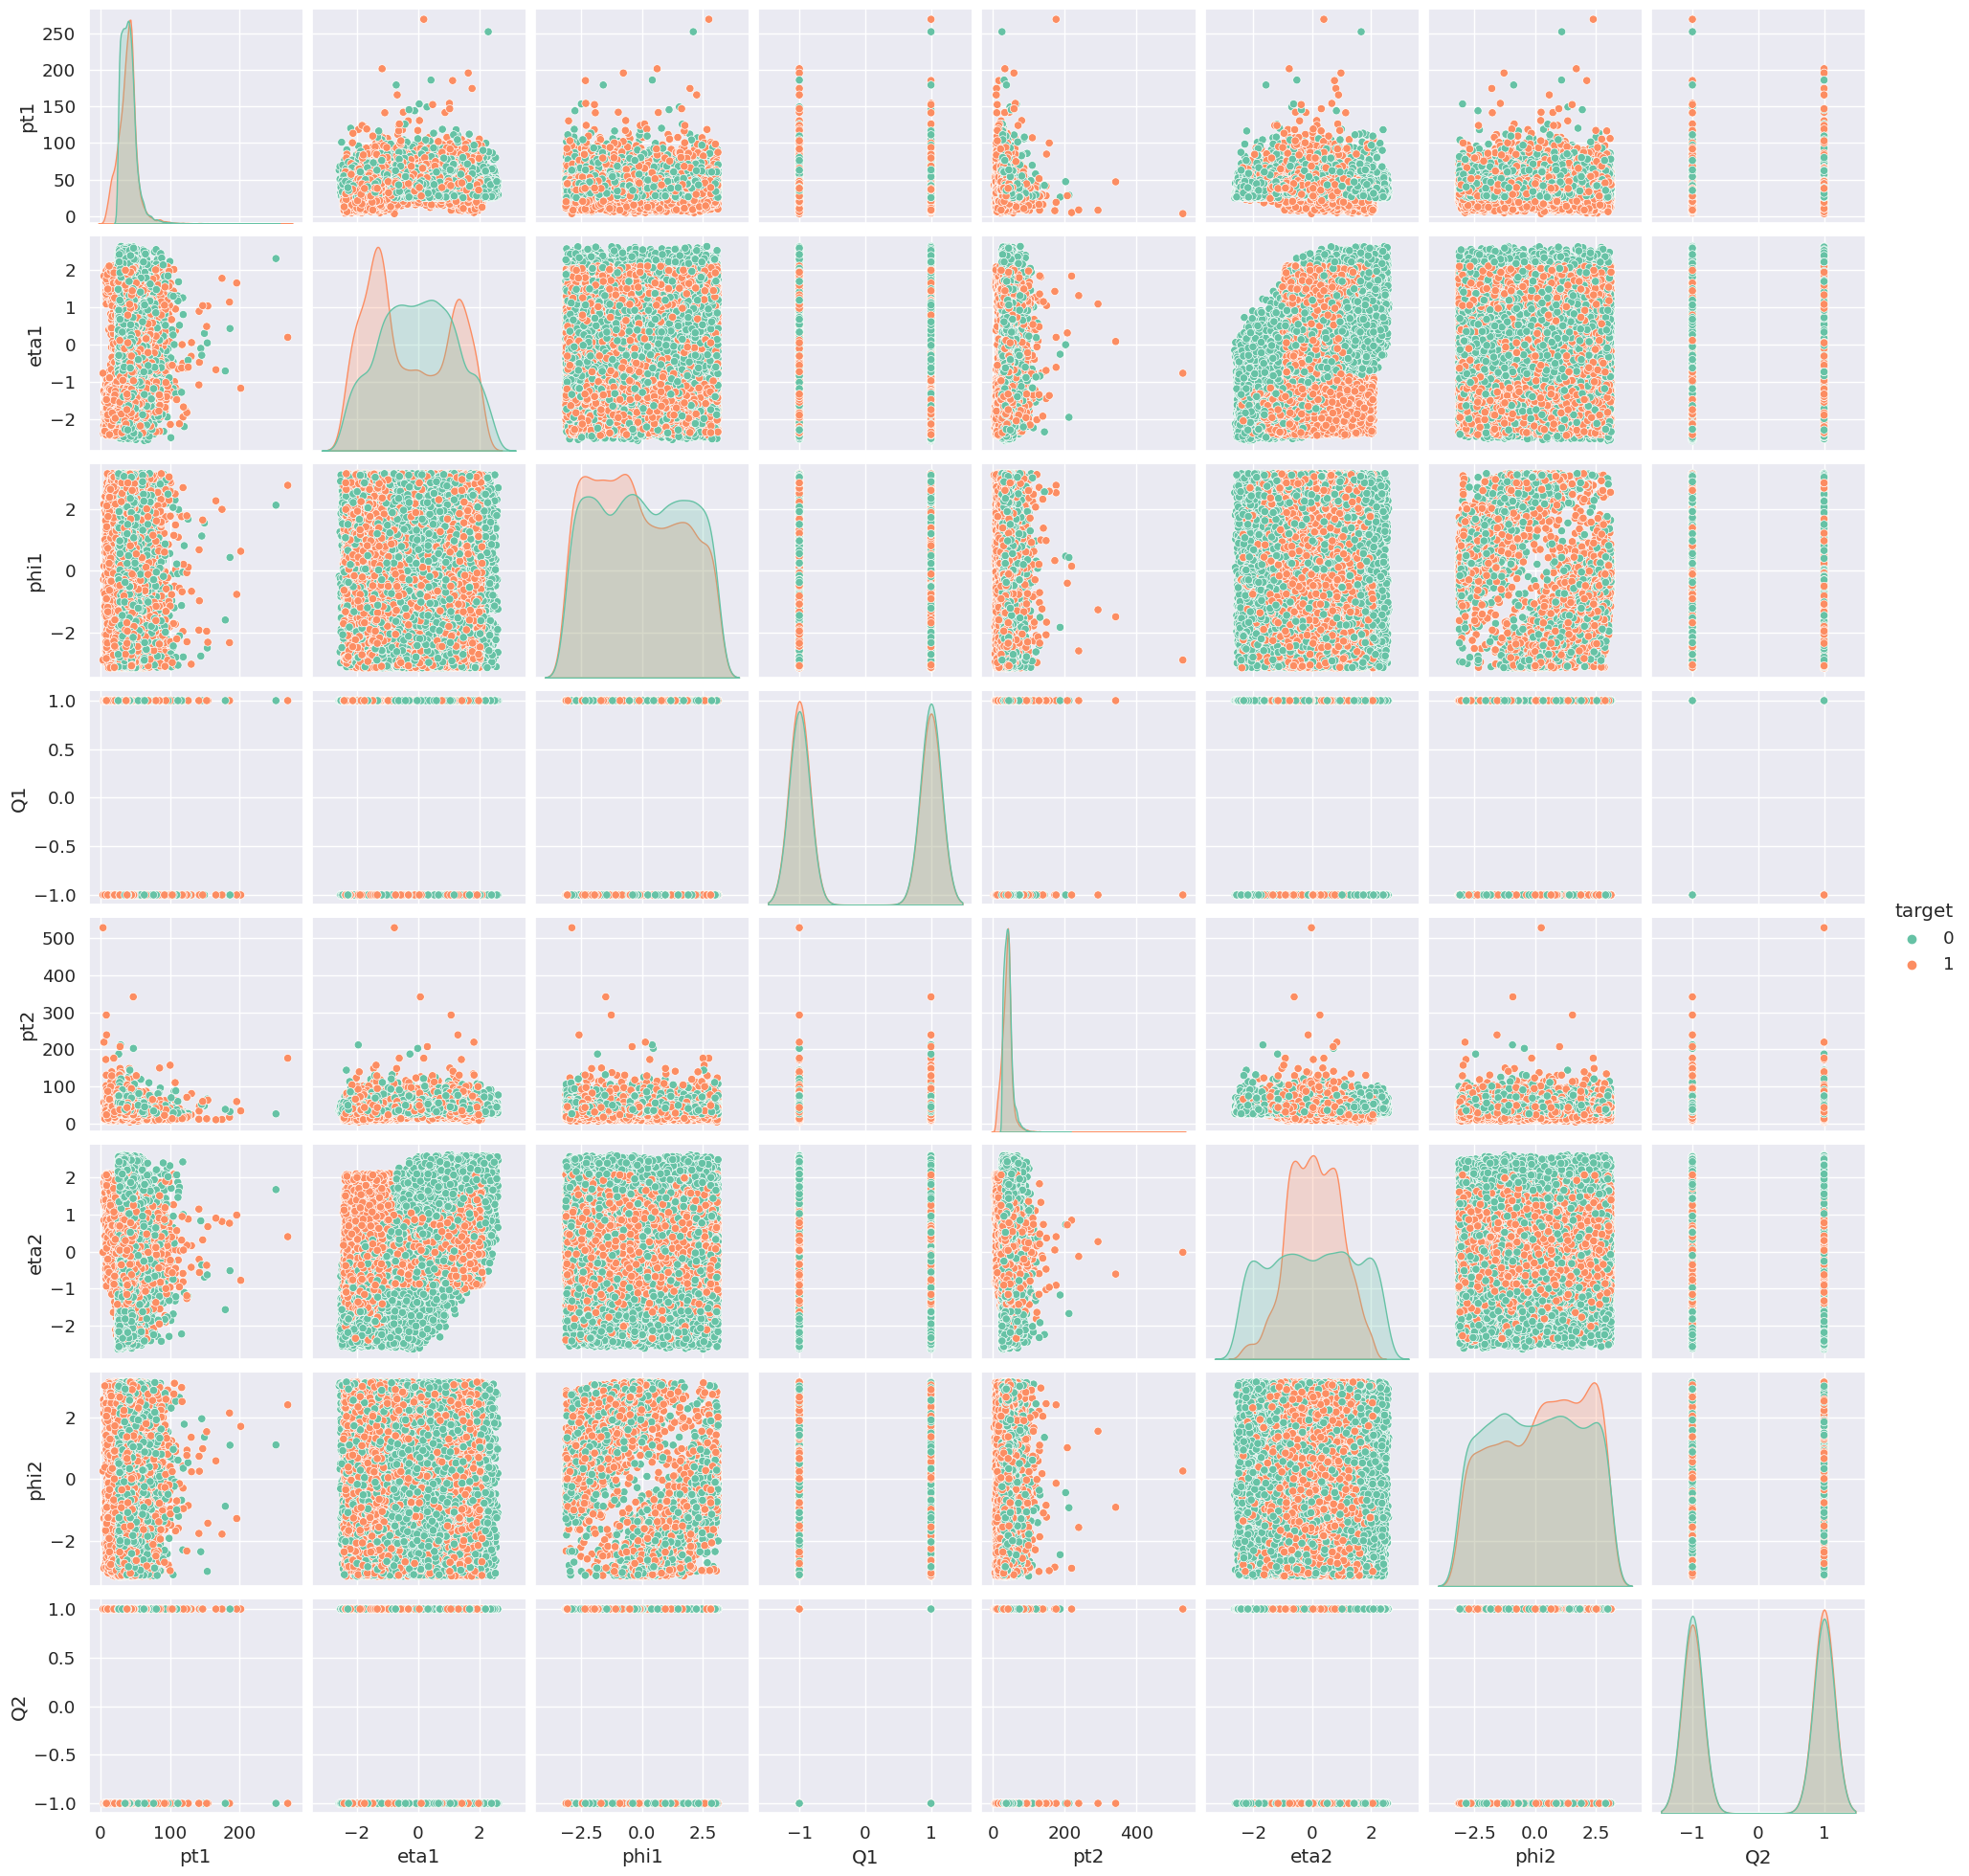

In [ ]:
import seaborn as sns
sns.pairplot(data=df, hue='target')

eta2 и phi2  - выразительный признак

#### Общая часть

In [ ]:
class_lim_proba = 0.5 # критерий принадлежности к тому или иному классу

Стандартизируйте данные

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X,y = df.drop('target', axis=1), df['target']
x_train,x_test, y_train,y_test  = train_test_split(X,y)


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Далее сформируйте датасет в pytorch-обертке

In [ ]:
device= torch.device('cuda')
x_train, x_test = torch.FloatTensor(x_train).to(device),  torch.FloatTensor(x_test).to(device)
y_train, y_test = torch.FloatTensor(y_train.values).to(device), torch.FloatTensor(y_test.values).to(device)

Напишите вспомогательные функции, в одной из которых будет проходить обучение, а во вторй - валидация. Также в отдельной функцией можно описать отрисовку кривых обучения. На одном графике расположите значение функции потерь на трейне и валидации, а на другом -- значение метрики качества на ваш выбор, также для трейна и валидации)

In [ ]:
from sklearn.metrics import roc_auc_score
from torch.utils.data import DataLoader

history = defaultdict(lambda: defaultdict(list))

def plot_learning_curves(history):
    '''
    Функция для отображения лосса и метрики во время обучения.
    '''
    # ваш код
    fig = plt.figure(figsize=(20,7))

    plt.subplot(1,2,1)
    plt.title('Лосс', fontsize=15)
    plt.plot(history['loss']['train'], label='train')
    plt.plot(history['loss']['val'], label='val')
    plt.xlabel('эпоха', fontsize=15)
    plt.legend()

    plt.subplot(1,2,2)
    plt.title('ROC AUC', fontsize=15)
    plt.plot(history['roc_auc']['train'], label='train')
    plt.plot(history['roc_auc']['val'], label='val')
    plt.xlabel('эпоха', fontsize=15)
    plt.legend();
    plt.show()


def train_epoch(model, criterion, opt,data_loader):
    '''
    Проход по данным для обучения в одной эпохе
    '''
    train_loss = 0
    train_roc_auc = 0
    num_train_batches = len(data_loader)
    for (X_batch, y_batch) in data_loader:

        # Обучаемся на батче (одна "итерация" обучения нейросети)
        logits = model(X_batch)
        loss = criterion(logits, y_batch.unsqueeze(dim=-1))
        # Обратный проход, шаг оптимизатора и зануление градиентов
        loss.backward()
        opt.step()
        opt.zero_grad()

        train_loss += loss.detach().cpu().numpy()
        train_roc_auc += roc_auc_score(y_batch.cpu().numpy(),logits.detach().cpu().numpy())

    # Подсчитываем лоссы и сохраням в "историю"
    train_loss /= num_train_batches
    train_roc_auc /= num_train_batches
    history['loss']['train'].append(train_loss)
    history['roc_auc']['train'].append(train_roc_auc )


def test_epoch(model, criterion,data_loader):
    '''
    Валидация на одной эпохе
    '''
        # Устанавливаем поведение dropout / batch_norm  в тестирование

    val_loss = 0
    val_roc_auc = 0
    num_val_batches = len(data_loader)
    model.eval()

    # Полный проход по валидации
    with torch.no_grad(): # Отключаем подсчет градиентов, то есть detach не нужен
        for (X_batch, y_batch) in data_loader:
            logits = model(X_batch)
            loss = criterion(logits, y_batch.unsqueeze(dim=-1))

            val_loss += loss.cpu().numpy().sum()
            val_roc_auc += roc_auc_score(y_batch.cpu().numpy(),logits.detach().cpu().numpy())

    # Подсчитываем лоссы и сохраням в "историю"
    val_loss /= num_val_batches
    val_roc_auc /= num_val_batches
    history['loss']['val'].append(val_loss)
    history['roc_auc']['val'].append(val_roc_auc)


Создание модели

In [ ]:
class SimpleModel(nn.Module):
    def __init__(self):
        '''
        Здесь объявляем все слои, которые будем использовать
        '''
        super(SimpleModel, self).__init__()
        self.linear1 = nn.Linear(8, 256)
        self.linear2 = nn.Linear(256, 64)
        self.linear3 = nn.Linear(64, 1)

    def forward(self, x):
        '''
        Здесь пишем в коде, в каком порядке какой слой будет применяться
        '''
        x = self.linear1((x))
        x = self.linear2(nn.ReLU()(x))
        x = self.linear3(nn.ReLU()(x))
        return x

Обучение

In [ ]:
batch_size = 100
num_epochs = 50

model = SimpleModel().to(device)

opt = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.BCEWithLogitsLoss()
from torch.utils.data import TensorDataset
test_dataloader = DataLoader(TensorDataset(x_test,y_test),shuffle=False, batch_size=batch_size)

for epoch in range(num_epochs):
    train_dataloader = DataLoader(TensorDataset(x_train,y_train),shuffle=True, batch_size=batch_size)

    train_epoch(model,criterion,opt,train_dataloader)

    test_epoch(model,criterion,test_dataloader)

Тестирование

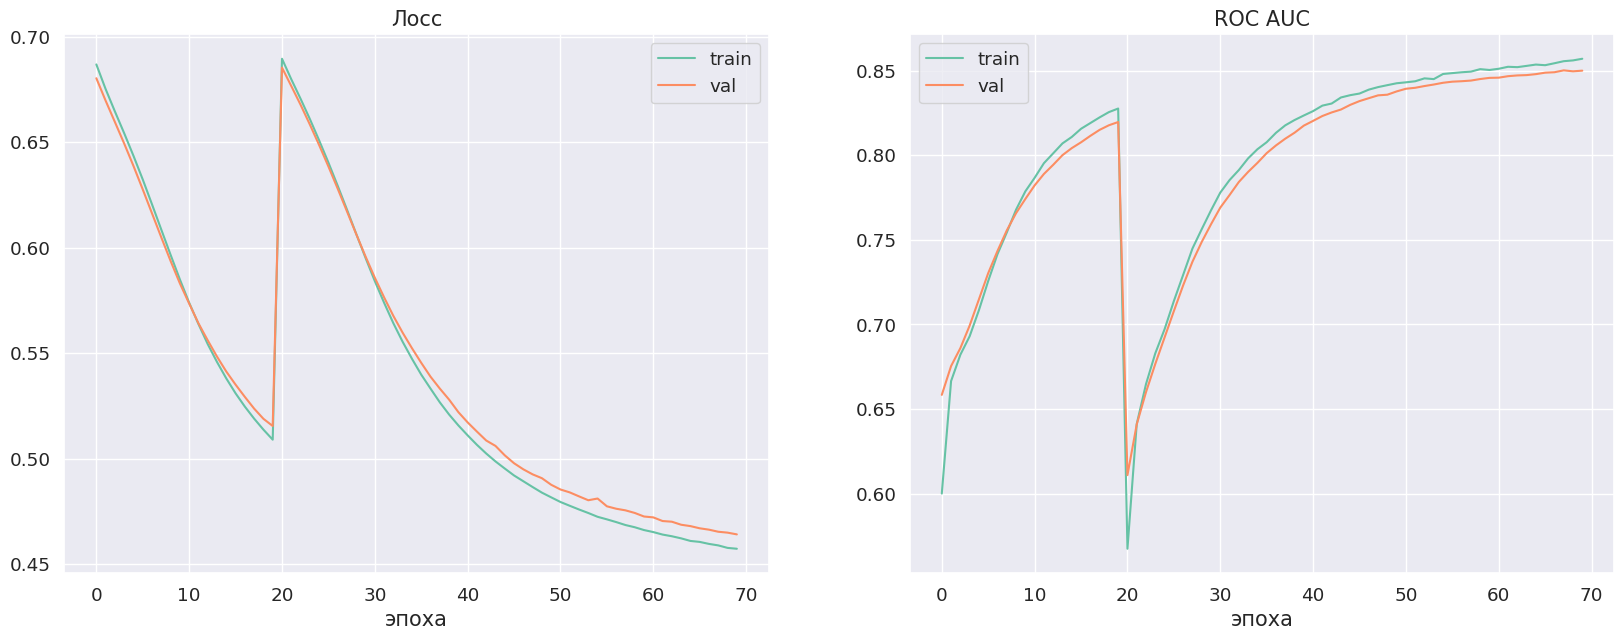

In [ ]:
plot_learning_curves(history)

**Выводы:** Нейросетевой фреймворк сложно применять к задачам разведочного анализа. Pytorch требует большое количество кода для применения своих методов. Полезно использовать обертки в виде Lightning для ускорения исследования.